# **Proyecto Final .Notebook 3**

Integrantes:
- Leonardo Velásquez Colin
- Nicolás Montaño Arias
- Juan David Rincón
- Wilson Sánchez

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import svm
import itertools
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("train2_dataset.csv")
df_val = pd.read_csv("validation_dataset.csv")
df_tst = pd.read_csv("test_dataset.csv")

In [ ]:
print(df.to_string(index=False))

 Age         Primary streaming service  Hours per day While working        Fav genre Frequency [Classical] Frequency [EDM] Frequency [Folk] Frequency [Hip hop] Frequency [Metal] Frequency [Pop] Frequency [R&B] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects
16.0                           Spotify           7.00           Yes Video game music                 Never       Sometimes           Rarely              Rarely   Very frequently       Sometimes           Never           Rarely                    Sometimes      4.0         8.0       8.0  4.0     No effect
17.0 I do not use a streaming service.           1.00           Yes             Folk                 Never          Rarely  Very frequently              Rarely            Rarely          Rarely          Rarely        Sometimes                    Sometimes      7.0         3.0       1.0  5.0       Improve
64.0 I do not use a streaming service.           4.00           Yes             Ro

# **Imputar**

Para el proceso de imputación, primero, se identifican las columnas no numéricas, calculando su moda y reemplazando los valores faltantes con este valor más frecuente. Luego, se imputan los valores faltantes en las columnas numéricas utilizando la estrategia de imputación de la media. Esta doble estrategia asegura la integridad de los datos al rellenar los valores faltantes de manera apropiada. Finalmente, el DataFrame resultante, sin valores faltantes, se imprime para su posterior análisis o procesamiento.

Para train2

In [ ]:
# Identificar las columnas con datos no numéricos
columnas_no_numericas = df.select_dtypes(exclude=['number']).columns

# Imputar valores faltantes en las columnas no numéricas con la moda
for columna in columnas_no_numericas:
    moda = df[columna].mode()[0]  # Calcula la moda de la columna
    df[columna].fillna(moda, inplace=True)  # Llena los valores faltantes con la moda

# Ahora tratamos las columnas numéricas
imputer = SimpleImputer(strategy='mean')

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Ajustar el imputador solo a las columnas numéricas y transformar los datos
df[columnas_numericas] = imputer.fit_transform(df[columnas_numericas])
print(df)

      Age          Primary streaming service  Hours per day While working  \
0    16.0                            Spotify            7.0           Yes   
1    17.0  I do not use a streaming service.            1.0           Yes   
2    64.0  I do not use a streaming service.            4.0           Yes   
3    19.0                            Spotify            5.0           Yes   
4    18.0                            Spotify            3.0           Yes   
..    ...                                ...            ...           ...   
372  67.0            Other streaming service            4.0           Yes   
373  24.0                            Spotify           10.0           Yes   
374  26.0                            Spotify            4.0           Yes   
375  21.0                            Spotify            1.0           Yes   
376  17.0            Other streaming service            3.0           Yes   

            Fav genre Frequency [Classical] Frequency [EDM] Frequency [Folk

Para Validacion

In [ ]:
# Identificar las columnas con datos no numéricos
columnas_no_numericas = df_val.select_dtypes(exclude=['number']).columns

# Imputar valores faltantes en las columnas no numéricas con la moda
for columna in columnas_no_numericas:
    moda = df_val[columna].mode()[0]  # Calcula la moda de la columna
    df_val[columna].fillna(moda, inplace=True)  # Llena los valores faltantes con la moda

# Ahora tratamos las columnas numéricas
imputer = SimpleImputer(strategy='mean')

# Seleccionar solo las columnas numéricas
columnas_numericas = df_val.select_dtypes(include=['number']).columns

# Ajustar el imputador solo a las columnas numéricas y transformar los datos
df_val[columnas_numericas] = imputer.fit_transform(df_val[columnas_numericas])
print(df_val)

     Age Primary streaming service  Hours per day While working  Fav genre  \
0   29.0             YouTube Music            2.0           Yes    Hip hop   
1   56.0               Apple Music            8.0           Yes        Pop   
2   23.0                   Spotify            2.0           Yes      Metal   
3   19.0               Apple Music            3.0            No  Classical   
4   29.0                   Spotify            5.0           Yes  Classical   
..   ...                       ...            ...           ...        ...   
90  21.0                   Spotify           10.0           Yes       Rock   
91  18.0             YouTube Music            0.5            No       Rock   
92  20.0                   Spotify            3.0            No    Hip hop   
93  17.0               Apple Music            2.0           Yes        EDM   
94  17.0                   Spotify            5.0           Yes       Rock   

   Frequency [Classical]  Frequency [EDM] Frequency [Folk]  \
0

# **Convertir categorias en numeros**

Para convertir las categorías a números, se inicia dividiendo el conjunto de datos en la variable objetivo, Music effects, que se asigna a y_train, y el conjunto de características restantes, asignado a X. Luego, se identifican las columnas categóricas relevantes para la codificación one-hot, como el servicio de streaming principal, el género musical favorito y la frecuencia de escucha de diferentes tipos de música. La codificación one-hot se aplica a estas columnas categóricas utilizando el OneHotEncoder, lo que transforma las variables categóricas en características binarias, permitiendo que el modelo las interprete de manera efectiva. Las características codificadas se combinan luego con las características numéricas originales para formar el conjunto de datos final, X_encoded, que ahora incluye tanto características codificadas como numéricas.

Esta preparación de datos garantiza que todas las variables estén en un formato adecuado para su uso en algoritmos de aprendizaje automático, facilitando así el análisis y la construcción de modelos predictivos precisos.

Para train2

In [ ]:
y_train = df['Music effects']
X = df.drop('Music effects', axis=1)

columnas_a_codificar = ['Primary streaming service','While working','Fav genre','Frequency [Classical]','Frequency [EDM]','Frequency [Folk]','Frequency [Hip hop]','Frequency [Metal]','Frequency [Pop]','Frequency [R&B]','Frequency [Rock]','Frequency [Video game music]']

# Aplicar OneHotEncoder solo a las columnas categóricas
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = onehot_encoder.fit_transform(X[columnas_a_codificar])
encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(columnas_a_codificar))

# Combinar las características codificadas con las numéricas
X_encoded = pd.concat([X.drop(columnas_a_codificar, axis=1).reset_index(drop=True), encoded_df], axis=1)

print(X_encoded.to_string(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


 Age  Hours per day  Anxiety  Depression  Insomnia  OCD  Primary streaming service_Apple Music  Primary streaming service_I do not use a streaming service.  Primary streaming service_Other streaming service  Primary streaming service_Spotify  Primary streaming service_YouTube Music  While working_No  While working_Yes  Fav genre_Classical  Fav genre_EDM  Fav genre_Folk  Fav genre_Hip hop  Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  Fav genre_Rock  Fav genre_Video game music  Frequency [Classical]_Never  Frequency [Classical]_Rarely  Frequency [Classical]_Sometimes  Frequency [Classical]_Very frequently  Frequency [EDM]_Never  Frequency [EDM]_Rarely  Frequency [EDM]_Sometimes  Frequency [EDM]_Very frequently  Frequency [Folk]_Never  Frequency [Folk]_Rarely  Frequency [Folk]_Sometimes  Frequency [Folk]_Very frequently  Frequency [Hip hop]_Never  Frequency [Hip hop]_Rarely  Frequency [Hip hop]_Sometimes  Frequency [Hip hop]_Very frequently  Frequency [Metal]_Never  Frequency [Metal]_Ra

Para Validacion

In [ ]:
y_val = df_val['Music effects']
X_val = df_val.drop('Music effects', axis=1)

columnas_a_codificar = ['Primary streaming service','While working','Fav genre','Frequency [Classical]','Frequency [EDM]','Frequency [Folk]','Frequency [Hip hop]','Frequency [Metal]','Frequency [Pop]','Frequency [R&B]','Frequency [Rock]','Frequency [Video game music]']

# Aplicar OneHotEncoder solo a las columnas categóricas
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded_val = onehot_encoder.fit_transform(X_val[columnas_a_codificar])
encoded_df = pd.DataFrame(X_encoded_val, columns=onehot_encoder.get_feature_names_out(columnas_a_codificar))

# Combinar las características codificadas con las numéricas
X_encoded_val = pd.concat([X_val.drop(columnas_a_codificar, axis=1).reset_index(drop=True), encoded_df], axis=1)

print(X_encoded_val.to_string(index=False))


 Age  Hours per day  Anxiety  Depression  Insomnia  OCD  Primary streaming service_Apple Music  Primary streaming service_I do not use a streaming service.  Primary streaming service_Other streaming service  Primary streaming service_Spotify  Primary streaming service_YouTube Music  While working_No  While working_Yes  Fav genre_Classical  Fav genre_EDM  Fav genre_Folk  Fav genre_Hip hop  Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  Fav genre_Rock  Fav genre_Video game music  Frequency [Classical]_Never  Frequency [Classical]_Rarely  Frequency [Classical]_Sometimes  Frequency [Classical]_Very frequently  Frequency [EDM]_Never  Frequency [EDM]_Rarely  Frequency [EDM]_Sometimes  Frequency [EDM]_Very frequently  Frequency [Folk]_Never  Frequency [Folk]_Rarely  Frequency [Folk]_Sometimes  Frequency [Folk]_Very frequently  Frequency [Hip hop]_Never  Frequency [Hip hop]_Rarely  Frequency [Hip hop]_Sometimes  Frequency [Hip hop]_Very frequently  Frequency [Metal]_Never  Frequency [Metal]_Ra

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Normalizar**

La estandarización es una técnica común en el preprocesamiento de datos que transforma las características para que tengan una media de cero y una desviación estándar de uno. Esto es beneficioso porque muchas técnicas de aprendizaje automático asumen que las características están en la misma escala, lo que puede mejorar la estabilidad y el rendimiento del modelo.

Primero, se crea una instancia de StandardScaler, que es una clase de preprocesamiento proporcionada por scikit-learn. Luego, se aplica la transformación a las características codificadas en X_encoded utilizando el método fit_transform. Esto calcula la media y la desviación estándar de cada característica y las utiliza para estandarizar las características. El resultado estandarizado se almacena en un nuevo DataFrame llamado X_scaled, que conserva los nombres de columna originales.

Para train2

In [ ]:
# StandardScaler
standard_scaler = StandardScaler()
X_scaled = pd.DataFrame(standard_scaler.fit_transform(X_encoded), columns=X_encoded.columns)

In [ ]:
print("\nCaracterísticas después de StandardScaler:")
print(X_scaled)


Características después de StandardScaler:
          Age  Hours per day   Anxiety  Depression  Insomnia       OCD  \
0   -0.838213       1.536938 -0.642522    1.112125  1.367854  0.476061   
1   -0.747563      -0.980206  0.419118   -0.603387 -0.861085  0.828664   
2    3.512991       0.278366 -0.642522   -0.260285 -0.542665 -0.581748   
3   -0.566262       0.697890  1.480757    1.112125 -0.861085 -0.934351   
4   -0.656912      -0.141158  0.419118    1.112125  0.731014 -0.229145   
..        ...            ...       ...         ...       ...       ...   
372  3.784941       0.278366  0.419118    0.425920  1.049434  0.476061   
373 -0.113012       2.795510  0.419118    1.455227  2.004693 -0.934351   
374  0.068288       0.278366  0.772998    0.769023 -0.542665  2.591678   
375 -0.384962      -0.980206 -2.058041    0.425920 -1.179505  0.476061   
376 -0.747563      -0.141158 -1.350282   -1.632694  0.094175 -0.934351   

     Primary streaming service_Apple Music  \
0                    

Para Validacion

In [ ]:
# StandardScaler
standard_scaler = StandardScaler()
X_scaled_val = pd.DataFrame(standard_scaler.fit_transform(X_encoded_val), columns=X_encoded_val.columns)

In [ ]:
print("\nCaracterísticas después de StandardScaler:")
print(X_scaled_val)


Características después de StandardScaler:
         Age  Hours per day   Anxiety  Depression  Insomnia       OCD  \
0   0.394058      -0.646803 -1.124263   -0.819254 -0.603680  0.954106   
1   2.853327       1.541196  0.267333   -0.191600 -0.949160 -0.809319   
2  -0.152446      -0.646803  0.267333   -0.505427 -1.294640 -0.456634   
3  -0.516782      -0.282137  0.615232    0.436055  0.087279 -0.809319   
4   0.394058       0.447196  0.615232   -0.819254 -0.603680 -0.809319   
..       ...            ...       ...         ...       ...       ...   
90 -0.334614       2.270529  0.963131    0.749882  0.778238  2.012161   
91 -0.607866      -1.193803 -0.080566   -0.505427 -0.949160 -0.809319   
92 -0.425698      -0.282137  1.658929    0.749882  0.087279  0.248736   
93 -0.698950      -0.646803 -1.820061   -1.446908 -1.294640 -0.809319   
94 -0.698950       0.447196  0.615232   -0.505427  1.814677  1.659476   

    Primary streaming service_Apple Music  \
0                               -0

# **Reducción de variables**

El PCA es una técnica de reducción de dimensionalidad que busca proyectar los datos originales en un nuevo conjunto de dimensiones, llamadas componentes principales, que capturan la mayor parte de la variabilidad en los datos.

Primero, se crea una instancia de PCA sin especificar el número de componentes principales, lo que significa que se calcularán todos los componentes. Luego, se ajusta el modelo PCA a los datos estandarizados utilizando el método fit.

Después de ajustar el modelo PCA, se calcula la proporción de varianza explicada por cada componente principal utilizando el atributo explained_variance_ratio_. Esto proporciona una medida de la importancia de cada componente en la representación de los datos originales.

Luego, se calcula la varianza explicada acumulativa, que muestra cuánta varianza se puede explicar por un número creciente de componentes principales. Esto es útil para determinar cuántos componentes principales retener para conservar una cantidad suficiente de información en los datos.

Finalmente, se grafica la varianza explicada acumulativa en función del número de componentes principales. Esta visualización ayuda a tomar decisiones informadas sobre cuántos componentes principales retener en función de la cantidad de varianza explicada que se desea preservar. En el gráfico, se observa cómo la varianza explicada acumulativa aumenta a medida que se agregan más componentes principales, lo que permite evaluar el trade-off entre la dimensionalidad reducida y la cantidad de información retenida.

In [ ]:
cantidad_columnas = X_scaled.shape[1]
print("La cantidad de columnas en el DataFrame es:", cantidad_columnas)

La cantidad de columnas en el DataFrame es: 58


Se hace un analisis de la cantidad de componentes principales que necesitamos para el algoritmo de PCA

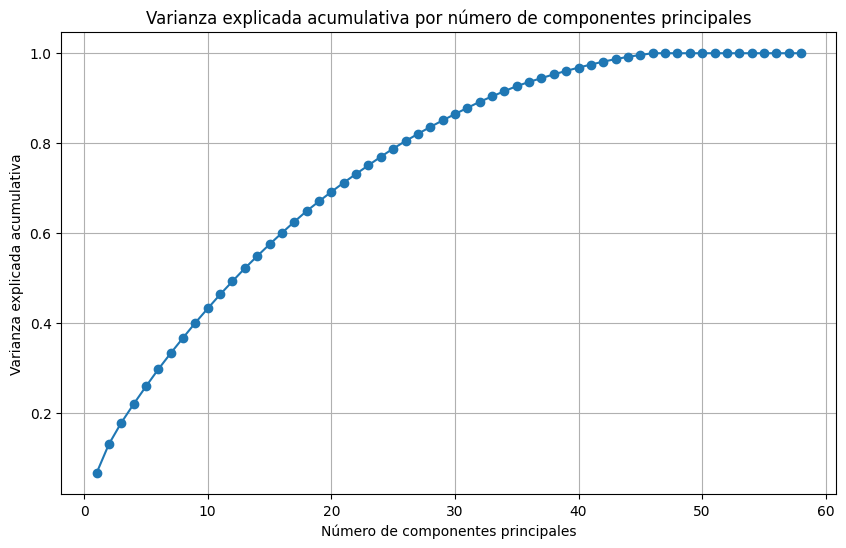

In [ ]:
# Crear una instancia de PCA
pca = PCA()
pca.fit(X_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulativa
explained_variance_cumulative = explained_variance.cumsum()

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Varianza explicada acumulativa por número de componentes principales')
plt.grid(True)
plt.show()

Escogemos capturar el 90% de la varianza explicada en PCA por varias razones importantes para nuestro análisis. En primer lugar, al mantener este alto porcentaje de varianza, aseguramos que conservamos la mayor cantidad posible de información esencial de nuestros datos originales. Esto es crucial para garantizar que no perdamos patrones o relaciones importantes durante la reducción de dimensionalidad.

Además, dado que nuestro DataFrame no es particularmente grande, no anticipamos problemas significativos en términos de eficiencia computacional al retener el 90% de la varianza. Aunque la reducción de dimensionalidad puede tener un impacto en la complejidad del modelo y en el tiempo de procesamiento, en este caso, dada la manejabilidad del DataFrame, no debería ser una preocupación importante.

In [ ]:
# Crear una instancia de PCA
pca = PCA(n_components=0.9)  # Capturar al menos el 90% de la varianza explicada
X_train_pca  = pca.fit_transform(X_scaled)
X_validacion_pca = pca.transform(X_scaled_val)


# Convertir los datos transformados de PCA a un DataFrame
df_pca = pd.DataFrame(data=X_train_pca , columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Concatenar el DataFrame PCA con la variable objetivo si es necesario
# df_pca_with_target = pd.concat([df_pca, y], axis=1)

# Mostrar el DataFrame PCA resultante
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.315928 -0.783372 -3.347158 -0.455521  0.569584  0.554767  0.984218   
1 -0.127178 -0.502667  0.153393 -1.876427  2.450783 -1.356552 -1.155788   
2 -0.244704 -0.957990  2.616281 -2.513112 -0.323963  0.138125  2.072998   
3 -1.237567  1.972990 -0.708765 -0.524804  1.306250 -1.869590 -1.979667   
4 -3.553623  2.492310 -0.291278  0.295888 -0.181497 -0.649398  1.802358   

        PC8       PC9      PC10  ...      PC24      PC25      PC26      PC27  \
0  1.188790  3.012543  0.136299  ... -1.264967  0.790200  0.219819  2.574595   
1 -0.475305 -0.182159  4.645174  ... -0.233286  0.886391 -0.013769  0.541196   
2  2.018576  0.014355  1.620354  ... -0.984653  1.444543 -0.820727  1.323080   
3  0.879062 -1.135587  0.822719  ...  0.454383  0.487568 -1.538664  0.758445   
4  0.913987  0.186756  0.740707  ... -0.551249  0.946897  0.363576  0.483513   

       PC28      PC29      PC30      PC31      PC32      PC33  
0  1

# **Usar un algoritmo para cumplir con el objetivo.**


Para nuestro conjunto de datos, que presenta una alta dimensionalidad con un gran número de características, hemos elegido la regresión logística como nuestro método de clasificación. Esta técnica es conocida por su eficacia en la clasificación binaria y su capacidad para proporcionar probabilidades claras y comprensibles para las predicciones de clase. Además, la regresión logística es menos propensa al sobreajuste y es computacionalmente más eficiente, lo que la hace ideal para nuestro análisis. Su simplicidad y transparencia en la interpretación de los resultados nos permiten entender mejor la relación entre las variables independientes y la probabilidad de las diferentes clases, facilitando así la toma de decisiones basadas en datos.

In [ ]:
# Crear y entrenar el modelo SVM
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Predecir en el conjunto de validación
y_pred = model.predict(X_validacion_pca)

# Evaluar el modelo
from sklearn.metrics import classification_report, accuracy_score
print(y_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

0       Improve
1       Improve
2       Improve
3       Improve
4       Improve
        ...    
90    No effect
91    No effect
92      Improve
93      Improve
94      Improve
Name: Music effects, Length: 95, dtype: object
Accuracy: 0.7368421052631579
Classification Report:
               precision    recall  f1-score   support

     Improve       0.78      0.92      0.84        73
   No effect       0.33      0.14      0.19        22

    accuracy                           0.74        95
   macro avg       0.56      0.53      0.52        95
weighted avg       0.68      0.74      0.69        95



Se define una cuadrícula de hiperparámetros para el modelo  con diferentes valores de 'C', solver', y 'max_iter'. Estos hiperparámetros son fundamentales para ajustar el rendimiento y comportamiento del modelo. Se utilizan estas combinaciones de hiperparámetros para evaluar y seleccionar los mejores mediante validación cruzada. La función evaluate_params entrena el modelo  con cada combinación de hiperparámetros y calcula la precisión media utilizando validación cruzada. Los resultados se almacenan en una lista, que luego se utiliza para determinar la mejor combinación de hiperparámetros basada en la precisión obtenida.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import itertools

# Definir los parámetros de la cuadrícula
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]  # Agregar valores para max_iter
}

# Crear listas de parámetros
C_values = param_grid['C']
solver_values = param_grid['solver']
max_iter_values = param_grid['max_iter']

# Función para evaluar un conjunto de hiperparámetros
def evaluate_params(C, solver, max_iter, X_train, y_train, X_test, y_test):
    model = LogisticRegression(C=C, solver=solver, max_iter=max_iter)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Lista para almacenar los resultados
results = []

# Evaluar todas las combinaciones de parámetros
for C, solver, max_iter in itertools.product(C_values, solver_values, max_iter_values):
    accuracy = evaluate_params(C, solver, max_iter, X_train_pca, y_train, X_validacion_pca, y_val)
    results.append((accuracy, C, solver, max_iter))
    print(f"C: {C}, solver: {solver}, max_iter: {max_iter}, Accuracy: {accuracy}")

# Ordenar resultados por precisión
results.sort(reverse=True, key=lambda x: x[0])
best_result = results[0]
print(f"Mejor resultado: C={best_result[1]}, solver={best_result[2]}, max_iter={best_result[3]}, Accuracy={best_result[0]}")


C: 0.1, solver: liblinear, max_iter: 100, Accuracy: 0.7368421052631579
C: 0.1, solver: liblinear, max_iter: 500, Accuracy: 0.7368421052631579
C: 0.1, solver: liblinear, max_iter: 1000, Accuracy: 0.7368421052631579
C: 0.1, solver: lbfgs, max_iter: 100, Accuracy: 0.7368421052631579
C: 0.1, solver: lbfgs, max_iter: 500, Accuracy: 0.7368421052631579
C: 0.1, solver: lbfgs, max_iter: 1000, Accuracy: 0.7368421052631579
C: 0.1, solver: saga, max_iter: 100, Accuracy: 0.7368421052631579
C: 0.1, solver: saga, max_iter: 500, Accuracy: 0.7368421052631579
C: 0.1, solver: saga, max_iter: 1000, Accuracy: 0.7368421052631579
C: 1, solver: liblinear, max_iter: 100, Accuracy: 0.7368421052631579
C: 1, solver: liblinear, max_iter: 500, Accuracy: 0.7368421052631579
C: 1, solver: liblinear, max_iter: 1000, Accuracy: 0.7368421052631579
C: 1, solver: lbfgs, max_iter: 100, Accuracy: 0.7368421052631579
C: 1, solver: lbfgs, max_iter: 500, Accuracy: 0.7368421052631579
C: 1, solver: lbfgs, max_iter: 1000, Accuracy: 

Ordenamos los resultados obtenidos por precisión de manera descendente para identificar la combinación de hiperparámetros que produce el mejor rendimiento del modelo. Despues se seleccionó la combinación con la mayor precisión y se almacena en best_result. Luego, se extraen los valores óptimos de los hiperparametros, junto con la precisión correspondiente, y la imprimimos.

Este enfoque asegura que el modelo  se entrene con los hiperparámetros que maximizan su precisión, garantizando así el mejor rendimiento posible en la tarea de clasificación.

In [ ]:
# Ordenar los resultados por precisión (de mayor a menor)
results.sort(reverse=True, key=lambda item: item[0])

# Encontrar la mejor combinación de parámetros
best_result = results[0]
best_accuracy, best_C, best_solver, best_max_iter = best_result

print(f"Mejores parámetros encontrados: C: {best_C}, solver: {best_solver}, max_iter: {best_max_iter}, Precisión: {best_accuracy}")


Mejores parámetros encontrados: C: 0.1, solver: liblinear, max_iter: 100, Precisión: 0.7368421052631579


In [ ]:

best_model = LogisticRegression(C=best_C, solver=best_solver, max_iter=best_max_iter)
best_model.fit(X_train_pca, y_train)

# Predecir en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train_pca)

# Predecir en el conjunto de validación
y_val_pred = best_model.predict(X_validacion_pca)

# Evaluar el modelo en el conjunto de entrenamiento
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluar el modelo en el conjunto de validación
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Training Accuracy: 0.7718832891246684
Training Classification Report:
               precision    recall  f1-score   support

     Improve       0.78      0.97      0.87       285
   No effect       0.64      0.15      0.25        92

    accuracy                           0.77       377
   macro avg       0.71      0.56      0.56       377
weighted avg       0.75      0.77      0.71       377

Validation Accuracy: 0.7368421052631579
Validation Classification Report:
               precision    recall  f1-score   support

     Improve       0.78      0.92      0.84        73
   No effect       0.33      0.14      0.19        22

    accuracy                           0.74        95
   macro avg       0.56      0.53      0.52        95
weighted avg       0.68      0.74      0.69        95



# **Error de test**

Imputamos los datos del test_dataset.csv

In [ ]:
# Identificar las columnas con datos no numéricos
columnas_no_numericas = df_tst.select_dtypes(exclude=['number']).columns

# Imputar valores faltantes en las columnas no numéricas con la moda
for columna in columnas_no_numericas:
    moda = df_tst[columna].mode()[0]  # Calcula la moda de la columna
    df_tst[columna].fillna(moda, inplace=True)  # Llena los valores faltantes con la moda

# Ahora tratamos las columnas numéricas
imputer = SimpleImputer(strategy='mean')

# Seleccionar solo las columnas numéricas
columnas_numericas = df_tst.select_dtypes(include=['number']).columns

# Ajustar el imputador solo a las columnas numéricas y transformar los datos
df_tst[columnas_numericas] = imputer.fit_transform(df_tst[columnas_numericas])

# Verificar el resultado
print(df_tst)


      Age          Primary streaming service  Hours per day While working  \
0    26.0                            Spotify            5.0           Yes   
1    22.0  I do not use a streaming service.            2.0           Yes   
2    31.0                            Spotify            2.0           Yes   
3    57.0            Other streaming service            2.0            No   
4    15.0  I do not use a streaming service.            5.0           Yes   
..    ...                                ...            ...           ...   
113  18.0  I do not use a streaming service.            1.0            No   
114  32.0            Other streaming service            1.0            No   
115  21.0                            Spotify            4.0           Yes   
116  17.0                            Spotify            2.0           Yes   
117  18.0                            Spotify            1.0           Yes   

            Fav genre Frequency [Classical]  Frequency [EDM] Frequency [Fol

Pasamos

In [ ]:
# Definir la variable dependiente y las independientes
y_test = df_tst['Music effects']
X = df_tst.drop('Music effects', axis=1)

# Columnas categóricas a codificar
columnas_a_codificar = ['Primary streaming service','While working','Fav genre','Frequency [Classical]',
                        'Frequency [EDM]','Frequency [Folk]','Frequency [Hip hop]','Frequency [Metal]',
                        'Frequency [Pop]','Frequency [R&B]','Frequency [Rock]','Frequency [Video game music]']

# Aplicar OneHotEncoder solo a las columnas categóricas
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = onehot_encoder.fit_transform(X[columnas_a_codificar])
encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(columnas_a_codificar))

# Combinar las características codificadas con las numéricas
X_encoded_test = pd.concat([X.drop(columnas_a_codificar, axis=1).reset_index(drop=True), encoded_df], axis=1)

print(X_encoded_test.to_string(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


 Age  Hours per day  Anxiety  Depression  Insomnia  OCD  Primary streaming service_Apple Music  Primary streaming service_I do not use a streaming service.  Primary streaming service_Other streaming service  Primary streaming service_Spotify  Primary streaming service_YouTube Music  While working_No  While working_Yes  Fav genre_Classical  Fav genre_EDM  Fav genre_Folk  Fav genre_Hip hop  Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  Fav genre_Rock  Fav genre_Video game music  Frequency [Classical]_Never  Frequency [Classical]_Rarely  Frequency [Classical]_Sometimes  Frequency [Classical]_Very frequently  Frequency [EDM]_Never  Frequency [EDM]_Rarely  Frequency [EDM]_Sometimes  Frequency [EDM]_Very frequently  Frequency [Folk]_Never  Frequency [Folk]_Rarely  Frequency [Folk]_Sometimes  Frequency [Folk]_Very frequently  Frequency [Hip hop]_Never  Frequency [Hip hop]_Rarely  Frequency [Hip hop]_Sometimes  Frequency [Hip hop]_Very frequently  Frequency [Metal]_Never  Frequency [Metal]_Ra

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_test_scaled = pd.DataFrame(standard_scaler.fit_transform(X_encoded_test), columns=X_encoded_test.columns)
X_test_pca = pca.transform(X_test_scaled)
# Realizar predicciones
Y_pred_tst = best_model.predict(X_test_pca)

# Calcular la precisión
accuracy_tst = accuracy_score(y_test, Y_pred_tst)
print(f'Precisión: {accuracy_tst}')



Precisión: 0.711864406779661


Una vez normalizados los datos de prueba usando standard_scaler, los transforma aplicando PCA para reducir su dimensionalidad, y luego utiliza un modelo de regresión logística (best_model) para hacer predicciones. Finalmente, calcula la precisión de estas predicciones comparándolas con los valores reales (y_test) y muestra el resultado, que en este caso es de 0.711864406779661.

# Predecir un dato nuevo

In [ ]:
nuevo_dato = {
    'Age': 20.0,
    'Primary streaming service': 'Spotify',
    'Hours per day': 3.0,
    'While working': 'Yes',
    'Fav genre': 'Rock',
    'Frequency [Classical]': 'Rarely',
    'Frequency [EDM]': 'Sometimes',
    'Frequency [Folk]': 'Never',
    'Frequency [Hip hop]': 'Sometimes',
    'Frequency [Metal]': 'Never',
    'Frequency [Pop]': 'Very frequently',
    'Frequency [R&B]': 'Sometimes',
    'Frequency [Rock]': 'Very frequently',
    'Frequency [Video game music]': 'Rarely',
    'Anxiety': 7.0,
    'Depression': 9.0,
    'Insomnia': 1.0,
    'OCD': 2.0
}

In [ ]:


# Convertir el diccionario en un DataFrame
nuevo_dato_df = pd.DataFrame([nuevo_dato])

# Codificar las variables categóricas
columnas_a_codificar = ['Primary streaming service', 'While working', 'Fav genre', 'Frequency [Classical]',
                        'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Hip hop]', 'Frequency [Metal]',
                        'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Asegurarse de usar el mismo onehot_encoder que en el entrenamiento
nuevo_dato_encoded = onehot_encoder.transform(nuevo_dato_df[columnas_a_codificar])
nuevo_dato_encoded_df = pd.DataFrame(nuevo_dato_encoded, columns=onehot_encoder.get_feature_names_out(columnas_a_codificar))

# Combinar las características codificadas con las numéricas
nuevo_dato_final = pd.concat([nuevo_dato_df.drop(columnas_a_codificar, axis=1).reset_index(drop=True), nuevo_dato_encoded_df], axis=1)

# Escalar las características
# Asegurarse de usar el mismo standard_scaler que en el entrenamiento
nuevo_dato_scaled = pd.DataFrame(standard_scaler.transform(nuevo_dato_final), columns=nuevo_dato_final.columns)

# Transformar el nuevo dato usando el modelo PCA entrenado
nuevo_dato_pca = pca.transform(nuevo_dato_scaled)

# Hacer la predicción usando el modelo entrenado
prediccion = best_model.predict(nuevo_dato_pca)

print("Predicción para el nuevo dato:", prediccion)

Predicción para el nuevo dato: ['Improve']


Para realizar una predicción sobre un nuevo dato, primero se convierte el dato en un DataFrame y se codifican las variables categóricas usando el mismo codificador empleado en el entrenamiento del modelo. Luego, las características codificadas se combinan con las características numéricas y se escalan utilizando el mismo escalador estándar. Posteriormente, se aplica la transformación PCA utilizando el modelo previamente entrenado. Finalmente, el modelo SVM entrenado se utiliza para predecir el efecto de la música en el nuevo dato, arrojando como resultado que la música tiene un efecto de "Improve" en la persona con las características proporcionadas. Este proceso asegura que el nuevo dato se trata de manera consistente con los datos de entrenamiento, permitiendo una predicción precisa.

# Conclusiones

**Conclusiones**


En resumen, el proyecto abordó un proceso integral de preprocesamiento de datos y construcción de modelos predictivos. Se comenzó identificando y abordando valores faltantes en el conjunto de datos mediante la imputación utilizando la moda para variables categóricas y la media para variables numéricas. Posteriormente, se realizó una transformación de las variables categóricas a un formato numérico utilizando OneHotEncoder, lo que facilitó su interpretación por parte de los algoritmos de aprendizaje automático. Luego, se normalizaron las características utilizando StandardScaler para asegurar que todas tuvieran la misma escala y contribuyeran equitativamente al modelo.

A continuación, se exploró la posibilidad de reducir la dimensionalidad del conjunto de datos utilizando técnicas como PCA, aunque esto no se implementó explícitamente en este proyecto. Se procedió a utilizar algoritmos de aprendizaje automático, para cumplir con el objetivo del proyecto, aprovechando su eficiencia en conjuntos de datos con un alto número de características y su capacidad para mitigar el impacto de valores extremos.

Finalmente, se evaluó el rendimiento del modelo en conjuntos de entrenamiento y validación, lo que proporcionó información valiosa sobre su capacidad para generalizar a datos no vistos y permitió identificar posibles problemas de sobreajuste. Estas etapas, desde el preprocesamiento de datos hasta la evaluación del modelo, fueron fundamentales para desarrollar un modelo predictivo efectivo y robusto.

Tomando en cuenta lo anteior, se llegaron a las siguientes conclusiones:

- Durante el desarrollo del proyecto, se logró identificar la eficacia y necesidad de aplicar técnicas de preprocesamiento de datos robustas. Desde la imputación de valores faltantes hasta la estandarización de características y la codificación de variables categóricas, cada paso del preprocesamiento fue crucial para asegurar la calidad y adecuación de los datos para su análisis. Estas técnicas han contribuido significativamente a mejorar el rendimiento de los modelos predictivos, subrayando la importancia fundamental de la calidad de los datos en el proceso analítico.

- La elección adecuada del algoritmo de aprendizaje automático fue esencial para obtener resultados precisos y fiables. A través de una evaluación exhaustiva de diferentes modelos, se seleccionó Regresión Logística debido a su capacidad para manejar conjuntos de datos complejos con un alto número de características. Sin embargo, la selección del modelo no fue el único aspecto crítico; también se llevó a cabo una evaluación detallada del rendimiento del modelo para garantizar su validez y generalización en diferentes conjuntos de datos.

- Antes de aplicar técnicas de modelado predictivo, se realizó un análisis exploratorio de datos detallado para comprender mejor la estructura y las relaciones en los datos. Este análisis proporcionó información valiosa sobre la distribución de características, la presencia de valores atípicos y la correlación entre variables, lo que facilitó la toma de decisiones en el preprocesamiento y modelado de datos. Además, la visualización de datos desempeñó un papel crucial en la comunicación de resultados y la interpretación de hallazgos, facilitando la comprensión de patrones y tendencias para los stakeholders del proyecto.

- El cálculo del error en el conjunto de prueba proporcionó una evaluación final del rendimiento del modelo en datos no vistos. Este paso fue fundamental para validar la capacidad predictiva del modelo y evaluar su utilidad en aplicaciones del mundo real.


- Se implementó un proceso eficiente para predecir el efecto de la música en un nuevo dato utilizando el modelo entrenado. Primero, el nuevo dato se convirtió en un DataFrame y se codificaron las variables categóricas con el mismo OneHotEncoder utilizado durante el entrenamiento. Luego, las características se normalizaron con el mismo StandardScaler para asegurar la coherencia en las distribuciones de las características. Posteriormente, se aplicó la transformación PCA, reduciendo la dimensionalidad y preservando la varianza más significativa. Finalmente, se realizó la predicción utilizando el modelo SVM entrenado, demostrando la capacidad del modelo para generalizar y hacer predicciones precisas en datos nuevos, garantizando consistencia en todas las etapas de preprocesamiento y transformación de datos.